
# Introduction to WordNet

Please integrate this notebook with the official documentation: https://www.nltk.org/api/nltk.corpus.reader.wordnet.html

**Authors**: Andrea Bacciu, Simone Tedeschi, Alessandro Scirè, Riccardo Orlando, Stefan Bejgu, Valerio Neri, Abelardo Carlos Martinez Lorenzo and Roberto Navigli.





In [1]:
!pip3 install nltk==3.6.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [2]:
import nltk
from nltk.corpus import wordnet as wn

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
print("WordNet {}".format(wn.get_version())) # print WordNet version

WordNet 3.0


# What is WordNet?
WordNet is a lexical-semantic resource that organizes nouns, verbs, adjectives, and adverbs in graph form and, in the case of nouns and verbs, into **taxonomy**. Lexical items are organized in groups of synonyms. In WordNet these groups are called **synsets** (for synonym set). Each synset corresponds to a distinct concept. Synsets are interlinked by means of semantic and lexical relations.

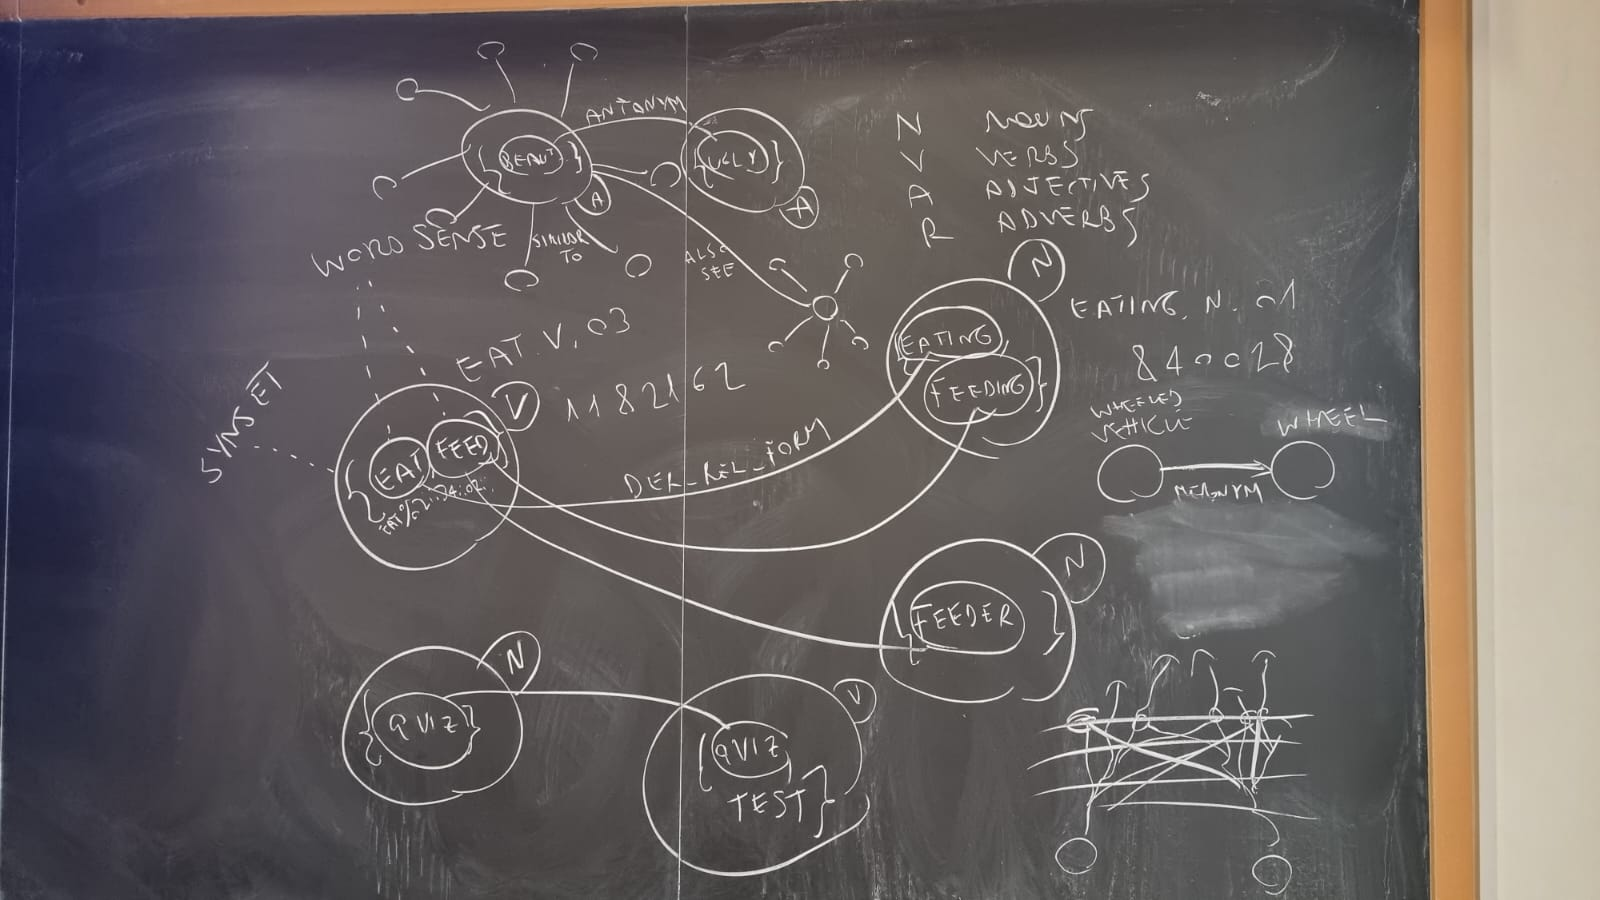

## What is a synset?

As previously mentioned a synset is a synonyms cluster that represents a given concept. Senses, instead, are lemmas occurring in a given synset. A sense univocally identifies a synset, where a synset and a lemma univocally identify a sense.

Senses in NLTK, and in WordNet, follow this syntax:
```
<lemma>.<part Of speech>.<sense id>
```
For instance, in the synset dog.n.01:

1.   Lemma: dog
2.   Part of speech: n (noun)
3.   Sense id: 01

The combination of sense id and the part of speech is used to distinguish between the different meanings of polysemous words.

A polysemous word is a word which refers to multiple concepts.









To better understand what a synset is, let's start playing with them.

In the following cells, we print out all the synonyms belonging to a particular synset.

In [5]:
print(wn.synset('dog.n.01'))
print(wn.synset('dog.n.01').lemmas())

def beautiful_print(synset):
  print(synset.definition())
  for word_sense in synset.lemmas():
    print(' ', word_sense.name(), word_sense.count())


Synset('dog.n.01')
[Lemma('dog.n.01.dog'), Lemma('dog.n.01.domestic_dog'), Lemma('dog.n.01.Canis_familiaris')]


In [6]:
beautiful_print(wn.synset('dog.n.01')) # We print out all the synonyms (lemmas) of the synset dog.n.01

a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
  dog 42
  domestic_dog 0
  Canis_familiaris 0


In [7]:
beautiful_print(wn.synset('start.v.01')) # We print out all the synonyms (lemmas) of the synset start.v.01

take the first step or steps in carrying out an action
  get_down 0
  begin 375
  get 0
  start_out 7
  start 159
  set_about 0
  set_out 9
  commence 8


In the next two cells, instead, we can notice how different sense ids of the same noun 'plane' correspond to different meanings:

In [8]:
beautiful_print(wn.synset('plane.n.01')) # We print out all the synonyms (in this case lemmas) related to the synset plane.n.01

an aircraft that has a fixed wing and is powered by propellers or jets
  airplane 5
  aeroplane 0
  plane 21


In [9]:
beautiful_print(wn.synset('plane.n.02')) # We print out all the synonyms (in this case lemmas) related to the synset plane.n.02

(mathematics) an unbounded two-dimensional shape
  plane 16
  sheet 0


Note that we can call both lemma_names() and lemmas() on the synset.

In [10]:
print(wn.synset('printer.n.03').lemmas())

print(wn.synset('printer.n.03').lemma_names())

[Lemma('printer.n.03.printer'), Lemma('printer.n.03.printing_machine')]
['printer', 'printing_machine']


Additionally, note that it is possible to access to synsets also from its lemma:


In [11]:
print(wn.synsets("race"))
len(wn.synsets('run', pos=wn.VERB))

[Synset('race.n.01'), Synset('race.n.02'), Synset('race.n.03'), Synset('subspecies.n.01'), Synset('slipstream.n.01'), Synset('raceway.n.01'), Synset('rush.v.01'), Synset('race.v.02'), Synset('race.v.03'), Synset('race.v.04')]


41

and it is possible to restrict the search by specifying the POS tags (the full POS tagset is ADJ, ADJ_SAT, ADV, NOUN or VERB (‘a’, ‘s’, ‘r’, ‘n’, or ‘v’)):

In [12]:
wn.synsets('dog', pos=wn.VERB)

[Synset('chase.v.01')]

Finally, if you know the byte offset used to identify a synset in the original Princeton WordNet data file, you can use that to instantiate the synset in NLTK:

In [13]:
s = wn.synset_from_pos_and_offset('n', 4543158)
print(s)

Synset('wagon.n.01')


## Lemmas

Now we'll see more details about lemmas.

Create a Lemma from a **word.pos.number.lemma** string where: **word** is the morphological stem identifying the synset **pos** is one of the module attributes ADJ, ADJ_SAT, ADV, NOUN or VERB **number** is the sense number, counting from 0. **lemma** is the morphological form of interest

Note that **word** and **lemma** can be different, e.g. the Synset ‘salt.n.03’ has the Lemmas ‘salt.n.03.salt’, ‘salt.n.03.saltiness’ and ‘salt.n.03.salinity’.

In [14]:
eat = wn.lemma('eat.v.03.eat')
print(type(eat))
feed = wn.lemma('eat.v.03.feed')
print(type(feed))

<class 'nltk.corpus.reader.wordnet.Lemma'>
<class 'nltk.corpus.reader.wordnet.Lemma'>


Now we can access to the corresponding key:

In [15]:
eat.key()

'eat%2:34:02::'

as well as its count (in the SemCor annotated corpus):

In [16]:
eat.count()

4

We can also access a lemma from its key:

In [17]:
wn.lemma_from_key(eat.key())

Lemma('feed.v.06.eat')

and then take its corresponding synset:

In [18]:
wn.lemma_from_key(eat.key()).synset()

Synset('feed.v.06')

Lemmas can also have relations between them:



In [19]:
# let's play with synsets and senses
for word_sense in wn.synset('quiz.n.01').lemmas():
  # retrieve the senses of the nominal synset { quiz.n.01 }
  for related_sense in word_sense.derivationally_related_forms():
    related_synset = related_sense.synset()
    print(related_sense, related_synset, [sense.name() for sense in related_synset.lemmas()])


Lemma('quiz.v.01.quiz') Synset('quiz.v.01') ['quiz', 'test']


In [21]:
# this synset is made up of { run, go, pass, lead, extend }
extend = wn.synset('run.v.03').lemmas()[4]

# we retrieve the der. related form lexical (i.e. sense level) relation between extend.v.02 and extent.n.02
extend.derivationally_related_forms()

[Lemma('extent.n.02.extent')]

In [22]:
# we retrieve the pertainymy lexical (i.e. sense level) relation between dental and tooth
dental = wn.synset('dental.a.01').lemmas()[0]
dental.pertainyms()

[Lemma('tooth.n.01.tooth')]

In [23]:
# same here for antonyms
beautiful = wn.synset('beautiful.a.01').lemmas()[0]
beautiful.antonyms()

[Lemma('ugly.a.01.ugly')]

In [24]:
# this is instead a synset-level, i.e. semantic, relation
# also see gives a related adjectival synset
bound = wn.synset('bound.a.01')
bound.also_sees()

[Synset('unfree.a.02')]

In [25]:
# this is also a synset-level, i.e. semantic, relation
bound.similar_tos()

[Synset('chained.s.01'),
 Synset('fettered.s.01'),
 Synset('furled.s.01'),
 Synset('pinioned.s.02'),
 Synset('tethered.s.01'),
 Synset('trussed.s.01'),
 Synset('wired.s.03')]

For a full list of relations, see https://wordnet.princeton.edu/documentation/wninput5wn or read Section 2.2.1 of this survey: https://www.diag.uniroma1.it/navigli/pubs/ACM_Survey_2009_Navigli.pdf

## WordNet is a Taxonomy

WordNet nouns and verbs are organized in taxonomical form, i.e. a graph where  nodes are represented by synsets.

There exist different types of relationships between the synset nodes. These relations include (but are not limited to) hypernymy/hyponymy, antonymy, entailment, and meronymy/holonymy.

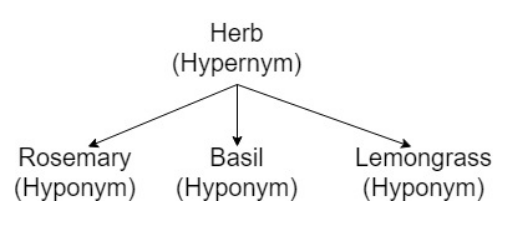






Let's start by taking the hypernyms (parent nodes) of plane (sense 1):

In [26]:
plane = wn.synset('plane.n.01')

print("> Hypernyms:")
for h in plane.hypernyms():
  beautiful_print(h)  # parents of plane

> Hypernyms:
a non-buoyant aircraft that requires a source of power to hold it aloft and to propel it
  heavier-than-air_craft 0


Let's start by taking the hypernyms (parent nodes) of the first sense of dog:

In [27]:
dog = wn.synset('dog.n.01')

print("> Hypernyms:")
for h in dog.hypernyms():
  beautiful_print(h)  # parents of dog

> Hypernyms:
any of various fissiped mammals with nonretractile claws and typically long muzzles
  canine 0
  canid 0
any of various animals that have been tamed and made fit for a human environment
  domestic_animal 1
  domesticated_animal 0


Similarly, we can take the hyponyms (instances) of dog:

In [29]:
print("\n\n> Hyponyms:")
for h in dog.hyponyms():
  beautiful_print(h)  # instances of dog



> Hyponyms:
small smooth-haired breed of African origin having a tightly curled tail and the inability to bark
  basenji 0
either of two Welsh breeds of long-bodied short-legged dogs with erect ears and a fox-like head
  corgi 0
  Welsh_corgi 0
an inferior dog or one of mixed breed
  cur 1
  mongrel 0
  mutt 0
a large breed having a smooth white coat with black or brown spots; originated in Dalmatia
  dalmatian 0
  coach_dog 0
  carriage_dog 0
bred of large heavy-coated white dogs resembling the Newfoundland
  Great_Pyrenees 0
breed of various very small compact wiry-coated dogs of Belgian origin having a short bearded muzzle
  griffon 0
  Brussels_griffon 0
  Belgian_griffon 0
a dog used in hunting game
  hunting_dog 0
a dog small and tame enough to be held in the lap
  lapdog 0
a large dog (usually with a golden coat) produced by crossing a St Bernard and a Newfoundland
  Leonberg 0
any of an old breed of small nearly hairless dogs of Mexico
  Mexican_hairless 0
a breed of very lar

Also, a meronym is some component of a larger whole (i.e. a part-of relation), that can represent the whole semantically. Since this is a vast relationship, nltk divides the meronym categories into part-representing whole(part_meronyms()), substance-representing whole(substance_meronyms()) and member-representing whole (member_meronyms()).

In [31]:
# physical part
print("> Part Meronyms:")
tree = wn.synset('tree.n.01')
for m in tree.part_meronyms():
  beautiful_print(m)  # parts of which tree is made of

> Part Meronyms:
a large rounded outgrowth on the trunk or branch of a tree
  burl 0
the upper branches and leaves of a tree or other plant
  crown 0
  treetop 5
any of the main branches arising from the trunk or a bough of a tree
  limb 0
  tree_branch 1
the base part of a tree that remains standing after the tree has been felled
  stump 5
  tree_stump 0
the main stem of a tree; usually covered with bark; the bole is usually the part that is commercially useful for lumber
  trunk 3
  tree_trunk 2
  bole 0


In [33]:
# substance part (liquids, material, etc.)
print("> Substance Meronyms:")
for m in tree.substance_meronyms():
  beautiful_print(m)

> Substance Meronyms:
the older inactive central wood of a tree or woody plant; usually darker and denser than the surrounding sapwood
  heartwood 0
  duramen 0
newly formed outer wood lying between the cambium and the heartwood of a tree or woody plant; usually light colored; active in water conduction
  sapwood 0


In [34]:
# abstract parts (e.g. a set)
print("> Member Meronyms:")
canis = wn.synset('canis.n.01')
for m in canis.member_meronyms():
  beautiful_print(m)

> Member Meronyms:
a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
  dog 42
  domestic_dog 0
  Canis_familiaris 0
Old World nocturnal canine mammal closely related to the dog; smaller than a wolf; sometimes hunts in a pack but usually singly or as a member of a pair
  jackal 0
  Canis_aureus 0
any of various predatory carnivorous canine mammals of North America and Eurasia that usually hunt in packs
  wolf 1


By taking the holonyms, instead, we take the object of another object is part of. We have the same distinction of meronyms, i.e. part, member and substance holonyms.

In [36]:
print("> Part Holonyms:")
wheel = wn.synset('wheel.n.01')
for h in wheel.part_holonyms():
  beautiful_print(h)

> Part Holonyms:
a vehicle that moves on wheels and usually has a container for transporting things or people
  wheeled_vehicle 0


In [37]:
print("> Member Holonyms:")
for h in dog.member_holonyms():
  beautiful_print(h)

> Member Holonyms:
type genus of the Canidae: domestic and wild dogs; wolves; jackals
  Canis 0
  genus_Canis 0
a group of hunting animals
  pack 0


In [38]:
print("> Substance Holonyms:")
wood = wn.synset('wood.n.01')
for h in wood.substance_holonyms():
  beautiful_print(h)

> Substance Holonyms:
long thick piece of wood or metal or concrete, etc., used in construction
  beam 9
a steady wooden block on which food can be cut or diced or wood can be split
  chopping_block 1
the wood of trees cut and prepared for use as building material
  lumber 6
  timber 3
a piece of wood that has been turned on a lathe; used as a baluster, chair leg, etc.
  spindle 0


Finally, the antonymy relation provides the opposite of given sense:

In [41]:
# lexical relationship
print("\n\n> Antonyms:")
good = wn.synset('good.a.01')
for a in good.lemmas()[0].antonyms():
  print(a)



> Antonyms:
Lemma('bad.a.01.bad')


In [42]:
print("\n\n> Antonyms:")
wealth = wn.synset('wealth.n.01')
for a in wealth.lemmas()[0].antonyms():
  print(a)  # opposite of wealth



> Antonyms:
Lemma('poverty.n.01.poverty')


In [45]:
print("\n\n> Pertainyms:")
dental = wn.synset('dental.a.01')
for p in dental.lemmas()[0].pertainyms():
  print(p)  # pertainym of dental



> Pertainyms:
Lemma('tooth.n.01.tooth')


In [51]:
print("\n\n> Derivationally related forms:")
run = wn.synset('run.n.07')
print(run.definition())
for d in run.lemmas()[0].derivationally_related_forms():
  print(d)  # derivationally related forms

print("\nSynset:")
synsets = wn.synsets("run", pos=wn.VERB)
for s in synsets:
  beautiful_print(s)



> Derivationally related forms:
the act of running; traveling on foot at a fast pace
Lemma('run.v.34.run')
Lemma('run.v.29.run')
Lemma('run.v.26.run')
Lemma('run.v.01.run')

Synset:
move fast by using one's feet, with one foot off the ground at any given time
  run 106
flee; take to one's heels; cut and run
  scat 0
  run 38
  scarper 0
  turn_tail 0
  lam 2
  run_away 12
  hightail_it 0
  bunk 0
  head_for_the_hills 0
  take_to_the_woods 0
  escape 0
  fly_the_coop 0
  break_away 0
stretch out over a distance, space, time, or scope; run or extend between two points or beyond a certain point
  run 21
  go 10
  pass 8
  lead 13
  extend 16
direct or control; projects, businesses, etc.
  operate 34
  run 20
have a particular form
  run 10
  go 10
move along, of liquids
  run 9
  flow 10
  feed 0
  course 0
perform as expected when applied
  function 9
  work 20
  operate 29
  go 3
  run 8
change or be different within limits
  range 34
  run 7
run, stand, or compete for an office or a 

It is also possible to obtain the common hypernyms of two synsets:

In [52]:
print(wn.synset('dog.n.01').lowest_common_hypernyms(wn.synset('cat.n.01')))
print(wn.synset('computer.n.01').lowest_common_hypernyms(wn.synset('mouse.n.04')))

[Synset('carnivore.n.01')]
[Synset('device.n.01')]


## Useful additional information stored in synsets

Synsets contain other information such as definitions (glosses) and usage examples that can be accessed as shown below.

Let's take the definition of a synset:

In [53]:
plane1 = wn.synset('plane.n.01')
print(f"Definition for plane.n.01: {plane1.definition()}")

plane2 = wn.synset('plane.n.02')
print(f"Definition for plane.n.02: {plane2.definition()}")

Definition for plane.n.01: an aircraft that has a fixed wing and is powered by propellers or jets
Definition for plane.n.02: (mathematics) an unbounded two-dimensional shape


And usage examples:

In [54]:
print(dog.examples())
print(plane1.examples())
print(plane2.examples())
print(good.examples())

['the dog barked all night']
['the flight was delayed due to trouble with the airplane']
['we will refer to the plane of the graph as the X-Y plane', 'any line joining two points on a plane lies wholly on that plane']
['good news from the hospital', 'a good report card', 'when she was good she was very very good', 'a good knife is one good for cutting', 'this stump will make a good picnic table', 'a good check', 'a good joke', 'a good exterior paint', 'a good secretary', 'a good dress for the office']


Get POS from synset:

In [55]:
print(f"Dog -> {dog.pos()}")
print(f"Good -> {good.pos()}")

Dog -> n
Good -> a


#Similarity between synsets

In WordNet, it is also possible to measure the similarity between two synsets. Let's instantiate some synsets, and then compute their similarity scores using different similarity measures.

In [56]:
dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')

hit = wn.synset('hit.v.01')
slap = wn.synset('slap.v.01')

The method *synset1.path_similarity(synset2)* returns a score denoting how similar two word senses are, based on the shortest path that connects the senses in the is-a (hypernym/hypnoym) taxonomy. The score is in the range 0 to 1.

In [57]:
dog.path_similarity(cat)

0.2

In [58]:
hit.path_similarity(slap)

0.14285714285714285

The method, *synset1.lch_similarity(synset2)* computes the Leacock-Chodorow similarity. It returns a score denoting how similar two word senses are, based on the shortest path that connects the senses (as above) and the maximum depth of the taxonomy in which the senses occur. The relationship is given as -log(p/2d) where p is the shortest path length and d the taxonomy depth.

In [59]:
dog.lch_similarity(cat)

2.0281482472922856

In [60]:
hit.lch_similarity(slap)

1.3121863889661687

Finally, *synset1.wup_similarity(synset2)* computes the Wu-Palmer similarity. It returns a score denoting how similar two word senses are, based on the depth of the two senses in the taxonomy and that of their Least Common Subsumer (most specific ancestor node). Note that at this time the scores given do _not_ always agree with those given by Pedersen’s Perl implementation of Wordnet Similarity.

In [61]:
dog.wup_similarity(cat)

0.8571428571428571

In [62]:
hit.wup_similarity(slap)

0.25

## Synset Closures

Compute transitive closures of synsets

In [63]:
dog = wn.synset('dog.n.01')

#lambda same as:
#def hypo(s):
#  return s.hyponyms()
hypo = lambda s: s.hyponyms()
hyper = lambda s: s.hypernyms()

In [64]:
list(dog.closure(hyper))

/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:579: UserWarning: Discarded redundant search for Synset('animal.n.01') at depth 7
  for synset in acyclic_breadth_first(self, rel, depth):


[Synset('canine.n.02'),
 Synset('domestic_animal.n.01'),
 Synset('carnivore.n.01'),
 Synset('animal.n.01'),
 Synset('placental.n.01'),
 Synset('organism.n.01'),
 Synset('mammal.n.01'),
 Synset('living_thing.n.01'),
 Synset('vertebrate.n.01'),
 Synset('whole.n.02'),
 Synset('chordate.n.01'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

In [65]:
list(dog.closure(hypo))

[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01'),
 Synset('cardigan.n.02'),
 Synset('pembroke.n.01'),
 Synset('feist.n.01'),
 Synset('pariah_dog.n.01'),
 Synset('liver-spotted_dalmatian.n.01'),
 Synset('brabancon_griffon.n.01'),
 Synset('courser.n.03'),
 Synset('dachshund.n.01'),
 Synset('hound.n.01'),
 Synset('rhodesian_ridgeback.n.01'),
 Synset('sporting_dog.n.01'),
 Synset('terrier.n.01'),
 Synset('large_poodle.n.01'),
 Synset('miniature_poodle.n.01'),
 Synset('standard_poodle.n.01'),
 Synset('toy_poodle.n.01'),
 Synset('chow.n.03'),
 Synset('keeshond.n.01'),
 Synset('pomerani

## A Usage Example

Let's see a practical use case of WordNet and of the functionalities that we have shown above.

We start by importing the WordNet lemmatizer from the Stem module:

In [67]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

Then, we choose a very simple sentence and tokenize it by just splitting over spaces:

In [66]:
sentence = "I am sitting on the river bank"
sentence = sentence.split(" ")

# note however that in order to find meanings for these words in WordNet, I need to lemmatize the various words in the sentence
# ideally obtaining the list ['I', 'be', 'sit', 'on', 'the', 'river', 'bank'] from ['I', 'am', 'sitting', 'on', 'the', 'river', 'bank']

At this point, for each word in the sentence:
1.   We take its lemma through to the WordNet lemmatizer, and
2.   From the lemma, we access to the synset using the WordNet API previously showed in the notebook



In [68]:
for word in sentence:
    lemma = lemmatizer.lemmatize(word)
    syns = wn.synsets(lemma)
    print(word, "->", syns)

I -> [Synset('iodine.n.01'), Synset('one.n.01'), Synset('i.n.03'), Synset('one.s.01')]
am -> [Synset('americium.n.01'), Synset('master_of_arts.n.01'), Synset('amplitude_modulation.n.01'), Synset('be.v.01'), Synset('be.v.02'), Synset('be.v.03'), Synset('exist.v.01'), Synset('be.v.05'), Synset('equal.v.01'), Synset('constitute.v.01'), Synset('be.v.08'), Synset('embody.v.02'), Synset('be.v.10'), Synset('be.v.11'), Synset('be.v.12'), Synset('cost.v.01')]
sitting -> [Synset('sitting.n.01'), Synset('sitting.n.02'), Synset('seance.n.01'), Synset('sitting.n.04'), Synset('sit.v.01'), Synset('sit.v.02'), Synset('sit_down.v.01'), Synset('sit.v.04'), Synset('model.v.03'), Synset('ride.v.01'), Synset('sit.v.07'), Synset('baby-sit.v.02'), Synset('seat.v.01'), Synset('sit.v.10'), Synset('seated.a.01'), Synset('sitting.s.02')]
on -> [Synset('on.a.01'), Synset('on.a.02'), Synset('along.r.01'), Synset('on.r.02'), Synset('on.r.03')]
the -> []
river -> [Synset('river.n.01')]
bank -> [Synset('bank.n.01'), 

In this way, for each original word we obtain all its possible synsets.

As we can see, several words in the example sentence are ambiguous, i.e. they could correspond to more than one meaning.

In [69]:
synsets = wn.synsets("bank")

print(f"Bank has the following {len(synsets)} possible meanings: ")
for synset in synsets:
    print(synset, "->", synset.definition())

Bank has the following 18 possible meanings: 
Synset('bank.n.01') -> sloping land (especially the slope beside a body of water)
Synset('depository_financial_institution.n.01') -> a financial institution that accepts deposits and channels the money into lending activities
Synset('bank.n.03') -> a long ridge or pile
Synset('bank.n.04') -> an arrangement of similar objects in a row or in tiers
Synset('bank.n.05') -> a supply or stock held in reserve for future use (especially in emergencies)
Synset('bank.n.06') -> the funds held by a gambling house or the dealer in some gambling games
Synset('bank.n.07') -> a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
Synset('savings_bank.n.02') -> a container (usually with a slot in the top) for keeping money at home
Synset('bank.n.09') -> a building in which the business of banking transacted
Synset('bank.n.10') -> a flight maneuver; aircraft tips laterally about its lo

The task that tries to assign the correct meaning to each word in context is called **Word Sense Disambiguation (WSD)**. Or I could perform the task of **word** or **word sense similarity**.